In [7]:
pip install openpyxl

   ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/250.0 kB ? eta -:--:--
   --------- ----------------------------- 61.4/250.0 kB 656.4 kB/s eta 0:00:01
   -------------------------------- ------- 204.8/250.0 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 250.0/250.0 kB 1.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import statistics
from os import listdir
import pycaret
from pycaret.classification import *
from sklearn import preprocessing
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
def clustering(data, participants): 
    
    cost = []
    silhouette = []

    for i in range(2, participants):
        kmeans = KMeans(n_clusters = i, max_iter = 500, random_state = 0)
        kmeans.fit_predict(data)
        
        # Calculate Silhoutte Score
        score = silhouette_score(data, kmeans.labels_, metric='euclidean')
        silhouette.append(score)
    
        # Calculates squared error for the clustered points
        cost.append(kmeans.inertia_)    
        
    # Plot the cost against K values
    plt.plot(range(2, participants), cost, color ='g', linewidth ='3')
    plt.xlabel("Value of K")
    plt.ylabel("Squared Error (Cost)")
    plt.show() # clear the plot
    
    # Plot the Silhouette Score against K values
    plt.plot(range(2, participants), silhouette, color ='b', linewidth ='3')
    plt.xlabel("Value of K")
    plt.ylabel("Silhouette Score")
    plt.show() # clear the plot
    # the point of the elbow is the
    # most optimal value for choosing k

In [3]:
def silhouette(data, clusters):
    kmeans = KMeans(n_clusters = clusters, max_iter = 500, random_state = 0)
    kmeans.fit_predict(data)
    
    #Create SilhouetteVisualizer instance with KMeans instance
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')#ax[q-1][mod])#, ax = ax[x%3][y%2]
    
    #Fit the visualizer
    visualizer.fit(data)
    #fig, ax = plt.subplots(3,2, figsize = (10,10))

# SWELL

In [4]:
swell = pd.read_csv("Final_CSVs/swell_new.csv")

In [5]:
# swell_extra = pd.read_excel('Personality_Files/swell_person.xlsx')
swell_extra = pd.read_excel('scored_surveys/swell_person.xlsx')

In [6]:
swell

,HR,RMSSD,SCL,id,dataset,stress
0,58,0.093757,119.071484,PP4,Train,0
1,999,999.000000,138.735573,PP19,Train,0
2,999,999.000000,999.000000,PP22,Train,1
3,999,999.000000,120.251942,PP3,Train,1
4,70,0.064568,561.332213,PP21,Train,0
...,...,...,...,...,...,...
3135,999,999.000000,158.138912,PP24,Test,1
3136,999,999.000000,999.000000,PP22,Test,1
3137,999,999.000000,93.893556,PP4,Test,0
3138,999,999.000000,999.000000,PP23,Test,0


In [7]:
swell_extra

,PP,Age,Gender,Occupation,Dominant hand,Glasses,smoke,coffee,alcohol,physical,stress,heart disease,medicine,Internal control index
0,PP1,27,m,student,right,no,6,6,6,6,6,no,no,2.93
1,PP2,25,m,student,right,no,6,6,6,4,5,no,no,4.25
2,PP3,24,m,student,right,no,6,6,6,6,6,no,no,3.61
3,PP4,24,m,student,right,no,6,6,6,2,6,no,no,3.61
4,PP5,24,f,student,right,no,6,6,6,6,6,no,no,3.71
5,PP6,24,m,student,right,no,6,6,6,6,6,no,no,3.86
6,PP7,22,m,student,right,no,6,6,6,6,6,no,no,3.64
7,PP8,27,m,MSc Electrical Engineering,right,yes,6,6,6,3,6,no,no,3.57
8,PP9,28,m,PhD informatics,right,no,6,6,6,2,6,no,no,3.25
9,PP10,25,m,Information Science,right,no,6,6,6,6,6,no,no,3.39


In [8]:
# Drop unnecessary features

swell_extra.drop(['heart disease'], axis=1, inplace=True)
swell_extra.drop(['medicine'], axis=1, inplace=True)
swell_extra.drop(['Glasses'], axis=1, inplace=True)
swell_extra.drop(['smoke'], axis=1, inplace=True)
swell_extra.drop(['alcohol'], axis=1, inplace=True)

In [9]:
# Group all Master students in one category

swell_extra['Occupation'] = np.where(swell_extra['Occupation']=="MSc Electrical Engineering","MSc", swell_extra['Occupation'])
swell_extra['Occupation'] = np.where(swell_extra['Occupation']=="Master MKE", "MSc", swell_extra['Occupation'])
swell_extra['Occupation'] = np.where(swell_extra['Occupation']=="MSc Technische Informatica", "MSc", swell_extra['Occupation'])

swell_extra['Occupation'] = np.where(swell_extra['Occupation']=="Computer Engineering", "student", swell_extra['Occupation'])
swell_extra['Occupation'] = np.where(swell_extra['Occupation']=="Physics", "student", swell_extra['Occupation'])
swell_extra['Occupation'] = np.where(swell_extra['Occupation']=="Information Science", "student", swell_extra['Occupation'])


swell_extra['Occupation'] = np.where(swell_extra['Occupation']=="Icelandic", "other", swell_extra['Occupation'])
swell_extra['Occupation'] = np.where(swell_extra['Occupation']=="Photography", "other", swell_extra['Occupation'])
swell_extra['Occupation'] = np.where(swell_extra['Occupation']=="Technische bestuurskunde", "other", swell_extra['Occupation'])

# Group all PhD students in one category

swell_extra['Occupation'] = np.where(swell_extra['Occupation']=="PhD informatics", "PhD", swell_extra['Occupation'])
swell_extra['Occupation'] = np.where(swell_extra['Occupation']=="student (Phd?)", "PhD", swell_extra['Occupation'])
swell_extra['Occupation'] = np.where(swell_extra['Occupation']=="PhD candidate", "PhD", swell_extra['Occupation'])

In [10]:
# Label Encoding categorical features

le = preprocessing.LabelEncoder()

swell_extra['Occupation'] = le.fit_transform(swell_extra['Occupation'])
swell_extra['Dominant hand'] = le.fit_transform(swell_extra['Dominant hand'])
swell_extra['Gender'] = le.fit_transform(swell_extra['Gender'])

In [11]:
swell_extra

,PP,Age,Gender,Occupation,Dominant hand,coffee,physical,stress,Internal control index
0,PP1,27,1,3,1,6,6,6,2.93
1,PP2,25,1,3,1,6,4,5,4.25
2,PP3,24,1,3,1,6,6,6,3.61
3,PP4,24,1,3,1,6,2,6,3.61
4,PP5,24,0,3,1,6,6,6,3.71
5,PP6,24,1,3,1,6,6,6,3.86
6,PP7,22,1,3,1,6,6,6,3.64
7,PP8,27,1,0,1,6,3,6,3.57
8,PP9,28,1,1,1,6,2,6,3.25
9,PP10,25,1,3,1,6,6,6,3.39


In [23]:
#from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler()
#swell_extra[['Age', 'Occupation', 'smoke', 'physical', 'stress', 'Internal control index']] = scaler.fit_transform(swell_extra[['Age', 'Occupation', 'smoke',  'physical', 'stress', 'Internal control index']])


In [12]:
scaler = StandardScaler()
swell_extra[["Age", "Gender", "Occupation", "Dominant hand", "coffee", "physical", "stress", "Internal control index"]] = scaler.fit_transform(swell_extra[["Age", "Gender", "Occupation", "Dominant hand", "coffee", "physical", "stress", "Internal control index"]])


In [13]:
swell_extra = swell_extra.rename(columns={"PP":"id"})
swell_extra

,id,Age,Gender,Occupation,Dominant hand,coffee,physical,stress,Internal control index
0,PP1,0.615457,0.685994,0.727171,0.294884,0.204124,0.821462,0.483739,-2.531632
1,PP2,0.000000,0.685994,0.727171,0.294884,0.204124,-0.231695,-0.272103,1.986695
2,PP3,-0.307729,0.685994,0.727171,0.294884,0.204124,0.821462,0.483739,-0.204009
3,PP4,-0.307729,0.685994,0.727171,0.294884,0.204124,-1.284851,0.483739,-0.204009
4,PP5,-0.307729,-1.457738,0.727171,0.294884,0.204124,0.821462,0.483739,0.138288
5,PP6,-0.307729,0.685994,0.727171,0.294884,0.204124,0.821462,0.483739,0.651734
6,PP7,-0.923186,0.685994,0.727171,0.294884,0.204124,0.821462,0.483739,-0.101320
7,PP8,0.615457,0.685994,-1.869867,0.294884,0.204124,-0.758273,0.483739,-0.340928
8,PP9,0.923186,0.685994,-1.004188,0.294884,0.204124,-1.284851,0.483739,-1.436280
9,PP10,0.000000,0.685994,0.727171,0.294884,0.204124,0.821462,0.483739,-0.957064


## Single-Attribute-Splitting (Personality)

In [14]:
# In order to cluster the users based on gender and personality, we keep only "Gender" and "Internal control index" 
# columns

swell_personality = swell_extra[['id', "Gender", "Internal control index"]]
swell_personality

,id,Gender,Internal control index
0,PP1,0.685994,-2.531632
1,PP2,0.685994,1.986695
2,PP3,0.685994,-0.204009
3,PP4,0.685994,-0.204009
4,PP5,-1.457738,0.138288
5,PP6,0.685994,0.651734
6,PP7,0.685994,-0.101320
7,PP8,0.685994,-0.340928
8,PP9,0.685994,-1.436280
9,PP10,0.685994,-0.957064


In [15]:
# Keep user IDs in a separate datarame

ids = swell_personality['id']
swell_personality.drop(['id'], axis=1, inplace=True)

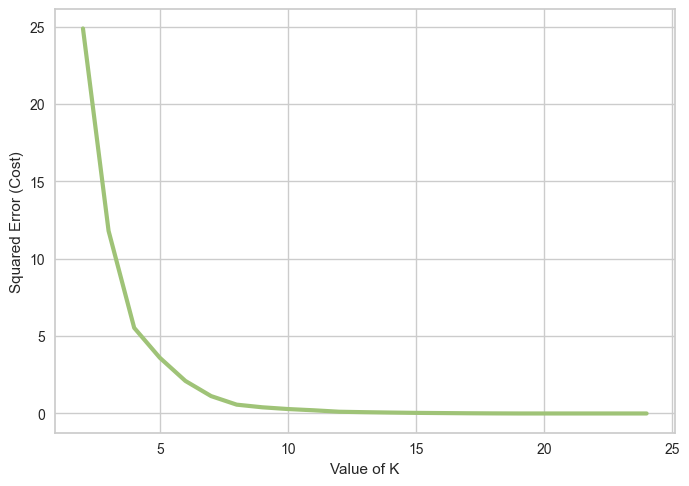

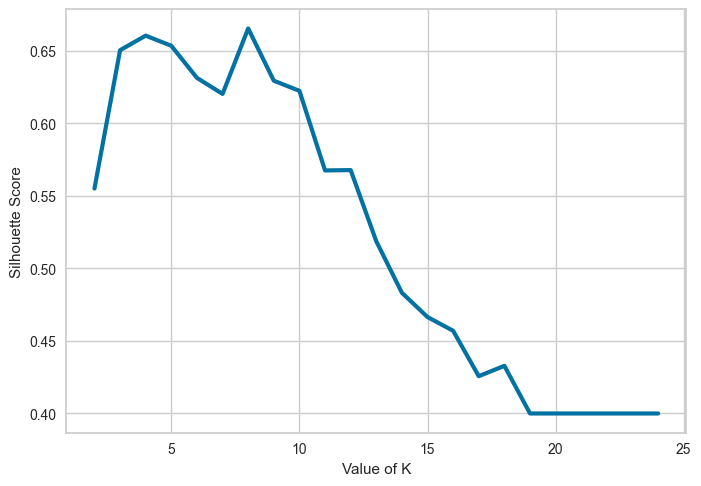

In [16]:
clustering(swell_personality, 25)

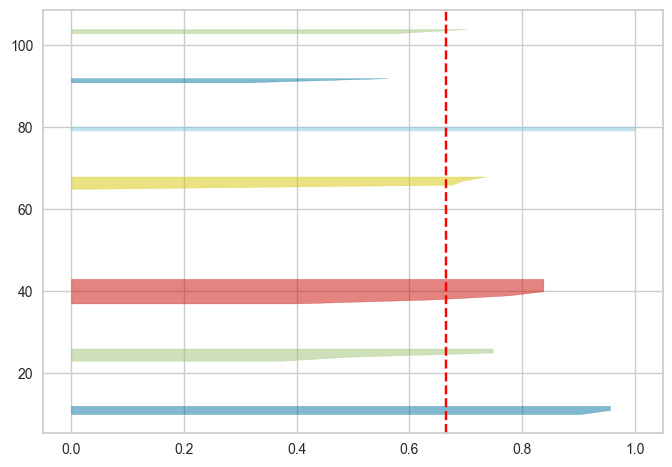

In [17]:
silhouette(swell_personality, 8)

In [18]:
kmeans = KMeans(n_clusters = 8, max_iter = 500, random_state = 0)
y = kmeans.fit_predict(swell_personality)
y = pd.DataFrame(y, columns=["Cluster"])
y.value_counts()

Cluster
2          7
1          4
4          4
0          3
5          2
6          2
7          2
3          1
dtype: int64

####  Visualization with t-SNE

In [33]:
print(swell_personality.shape)

(25, 2)


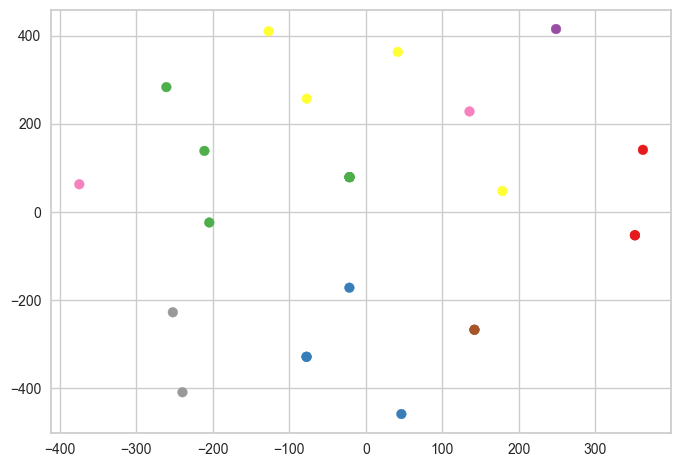

In [34]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

kmeans = KMeans(n_clusters=8, max_iter=500, random_state=0)
model = kmeans.fit(swell_personality)

# Choose a perplexity value
perplexity_value = 20  # Adjust this value as needed

tsne = TSNE(perplexity=perplexity_value).fit_transform(swell_personality)
plt.scatter(x=tsne[:, 0], y=tsne[:, 1], c=model.labels_, cmap='Set1')

In [20]:
clusters = pd.concat([ids, y], axis=1)
clusters

,id,Cluster
0,PP1,3
1,PP2,0
2,PP3,2
3,PP4,2
4,PP5,1
5,PP6,4
6,PP7,2
7,PP8,2
8,PP9,6
9,PP10,6


In [21]:
swell_grouped_all = swell.join(clusters.set_index('id'), on='id')
swell_grouped_all

,HR,RMSSD,SCL,id,dataset,stress,Cluster
0,58,0.093757,119.071484,PP4,Train,0,2
1,999,999.000000,138.735573,PP19,Train,0,1
2,999,999.000000,999.000000,PP22,Train,1,2
3,999,999.000000,120.251942,PP3,Train,1,2
4,70,0.064568,561.332213,PP21,Train,0,7
...,...,...,...,...,...,...,...
3135,999,999.000000,158.138912,PP24,Test,1,4
3136,999,999.000000,999.000000,PP22,Test,1,2
3137,999,999.000000,93.893556,PP4,Test,0,2
3138,999,999.000000,999.000000,PP23,Test,0,5


In [22]:
swell_grouped_all.to_csv("Final_CSVs/swell_clusters_personality.csv", index = False)

In [4]:
swell_grouped_all = pd.read_csv('Final_CSVs/swell_clusters_personality.csv')

In [5]:
# Drop 'dataset' to run pycaret tests based on "Cluster".

swell_grouped_all = swell_grouped_all.drop('dataset', axis = 1)
swell_grouped_all

,HR,RMSSD,SCL,id,stress,Cluster
0,58,0.093757,119.071484,PP4,0,2
1,999,999.000000,138.735573,PP19,0,1
2,999,999.000000,999.000000,PP22,1,2
3,999,999.000000,120.251942,PP3,1,2
4,70,0.064568,561.332213,PP21,0,7
...,...,...,...,...,...,...
3135,999,999.000000,158.138912,PP24,1,4
3136,999,999.000000,999.000000,PP22,1,2
3137,999,999.000000,93.893556,PP4,0,2
3138,999,999.000000,999.000000,PP23,0,5


In [6]:
unique_participants = swell_grouped_all["Cluster"].unique()
all_group = swell_grouped_all.groupby('Cluster')

In [7]:
print(unique_participants)

[2 1 7 5 3 4 0 6]


In [8]:
for participant in unique_participants:
    print("Participant: ",participant)    
    part_df = all_group.get_group(participant)

    unique_ids = part_df['id'].unique()
    print("Unique IDs:", unique_ids)

Participant:  2
Unique IDs: ['PP4' 'PP22' 'PP3' 'PP8' 'PP14' 'PP18' 'PP7']
Participant:  1
Unique IDs: ['PP19' 'PP5' 'PP20' 'PP16']
Participant:  7
Unique IDs: ['PP21' 'PP17']
Participant:  5
Unique IDs: ['PP12' 'PP23']
Participant:  3
Unique IDs: ['PP1']
Participant:  4
Unique IDs: ['PP24' 'PP25' 'PP6' 'PP11']
Participant:  0
Unique IDs: ['PP2' 'PP15' 'PP13']
Participant:  6
Unique IDs: ['PP9' 'PP10']


In [10]:
for participant in unique_participants:
  print("Group: ", participant)
  part_df = all_group.get_group(participant)

  # Count the number of rows for each ID using value_counts()
  id_counts = part_df['id'].value_counts()

  # Print the ID and its corresponding count
  print("ID Counts:")
  for id, count in id_counts.items():
    print(f"  ID: {id}, Count: {count}")

Group:  2
ID Counts:
  ID: PP7, Count: 130
  ID: PP14, Count: 129
  ID: PP4, Count: 128
  ID: PP3, Count: 128
  ID: PP22, Count: 126
  ID: PP18, Count: 119
  ID: PP8, Count: 116
Group:  1
ID Counts:
  ID: PP19, Count: 130
  ID: PP20, Count: 129
  ID: PP16, Count: 129
  ID: PP5, Count: 125
Group:  7
ID Counts:
  ID: PP17, Count: 129
  ID: PP21, Count: 106
Group:  5
ID Counts:
  ID: PP12, Count: 129
  ID: PP23, Count: 129
Group:  3
ID Counts:
  ID: PP1, Count: 129
Group:  4
ID Counts:
  ID: PP24, Count: 130
  ID: PP25, Count: 128
  ID: PP11, Count: 127
  ID: PP6, Count: 126
Group:  0
ID Counts:
  ID: PP13, Count: 126
  ID: PP2, Count: 121
  ID: PP15, Count: 121
Group:  6
ID Counts:
  ID: PP10, Count: 128
  ID: PP9, Count: 122


In [11]:
def train_test_split_per_user(data, train_size=0.7):
    users = list(set(data.id))
    users = sorted(users, reverse=True)  # fix randomness
    total_users = len(users)
    slice = int(train_size * total_users)
    users_train = users[:slice]
    users_test = users[slice:]
    return data[data.id.isin(users_train)], data[data.id.isin(users_test)]

In [16]:
from sklearn.model_selection import train_test_split
import os  # Import os module for folder creation

# Specify folder name
folder_name = "SWELL_Single_Attribute_Splitting_Output_Files"

# Load the CSV data into a pandas dataframe
df_user_info = pd.read_csv("Scored_Surveys/swell_person.csv", sep=";")

accuracies_swell = []
precision_swell = []
recall_swell = []
f1scores_swell = []

for participant in unique_participants:
    print("Group: ",participant)    
    part_df = all_group.get_group(participant)

    # -----------------------------------------------------

    # group 3 has only one id
    if participant == 3: # ValueError: Found array with 0 sample(s) (shape=(0, 4)) while a minimum of 1 is required by SimpleImputer.
        train_data, test_data = train_test_split(part_df)
    else:
        train_data, test_data = train_test_split_per_user(part_df)

    fold_groups = train_data.id

    # Save the 'id' column from the test set
    test_ids = test_data['id']

    train_data = train_data.drop(columns=['id'])
    test_data = test_data.drop(columns=['id'])

    # -----------------------------------------------------

    grid = setup(data=train_data, target='stress', fix_imbalance = True, html=False, verbose=False, test_data=test_data) #fix_imbalance = True,
    best = compare_models(sort='F1')
    accuracies_swell.append(pull()['Accuracy'][0])
    precision_swell.append(pull()['Prec.'][0])
    recall_swell.append(pull()['Recall'][0])
    f1scores_swell.append(pull()['F1'][0])
    print(best)

    # ---------------------------------------------------

    # Make predictions using the best model
    predictions = predict_model(best, data=test_data)

    # Add 'id' column back to predictions DataFrame
    predictions['PP'] = test_ids  # Use the 'id' column from the test data

    # Merge the dataframes based on the 'PP' column
    predictions_with_info = predictions.merge(df_user_info, on="PP", how="left")

    # Extract true labels (y_true), rename the column
    y_true = predictions_with_info[['stress_x']].rename(columns={'stress_x': 'y_true'})

    # Extract predicted labels (y_pred), rename the column
    y_pred = predictions_with_info[['prediction_label']].rename(columns={'prediction_label': 'y_pred'})

    # Identify protected attribute columns (assuming you know the column names)
    protected_attributes = predictions_with_info[['Age', 'Gender', 'Occupation']]

    # Concatenate DataFrames containing predictions and protected attributes
    all_data = pd.concat([test_ids.reset_index(drop=True), y_true, y_pred, protected_attributes], axis=1)

    # Create filename
    filename = f"predictions_{participant}.csv"

    # Create folder if it doesn't exist
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)  # Create folder using makedirs()

    # Create full path with folder name
    filepath = os.path.join(folder_name, filename)

    # Save predictions
    all_data.to_csv(filepath, index=False)

    print(f"Predictions saved to: {filepath}")

Group:  2


                                    Model  Accuracy     AUC  Recall   Prec.  \
knn                K Neighbors Classifier    0.6055  0.6539  0.7766  0.6019   
et                 Extra Trees Classifier    0.6273  0.6525  0.5637  0.6812   
rf               Random Forest Classifier    0.6212  0.6566  0.5711  0.6686   
gbc          Gradient Boosting Classifier    0.6112  0.6688  0.5526  0.6591   
lightgbm  Light Gradient Boosting Machine    0.6133  0.6714  0.5377  0.6681   
ada                  Ada Boost Classifier    0.5836  0.6193  0.5264  0.6374   
dt               Decision Tree Classifier    0.5974  0.6084  0.5192  0.6515   
nb                            Naive Bayes    0.5579  0.5676  0.3548  0.6612   
lda          Linear Discriminant Analysis    0.5758  0.5860  0.3323  0.7275   
lr                    Logistic Regression    0.5738  0.5763  0.3285  0.7252   
svm                   SVM - Linear Kernel    0.5240  0.0000  0.4815  0.4786   
ridge                    Ridge Classifier    0.5677 

                                    Model  Accuracy     AUC  Recall   Prec.  \
knn                K Neighbors Classifier    0.7754  0.8337  0.8538  0.7578   
et                 Extra Trees Classifier    0.7677  0.8282  0.8538  0.7500   
gbc          Gradient Boosting Classifier    0.7712  0.8385  0.8324  0.7613   
rf               Random Forest Classifier    0.7597  0.8087  0.8527  0.7390   
lightgbm  Light Gradient Boosting Machine    0.7558  0.8312  0.8687  0.7293   
dt               Decision Tree Classifier    0.7515  0.7670  0.8313  0.7416   
ada                  Ada Boost Classifier    0.7320  0.7889  0.7654  0.7464   
lda          Linear Discriminant Analysis    0.5465  0.5080  0.7758  0.5501   
ridge                    Ridge Classifier    0.5471  0.0000  0.7659  0.5504   
nb                            Naive Bayes    0.5466  0.4910  0.6967  0.5636   
lr                    Logistic Regression    0.4874  0.5082  0.6297  0.5028   
svm                   SVM - Linear Kernel    0.4997 

                                    Model  Accuracy     AUC  Recall   Prec.  \
knn                K Neighbors Classifier    0.6064  0.6279   0.620  0.5495   
lightgbm  Light Gradient Boosting Machine    0.5955  0.5892   0.560  0.5506   
ada                  Ada Boost Classifier    0.6164  0.6033   0.525  0.5283   
dt               Decision Tree Classifier    0.5827  0.5783   0.540  0.5149   
et                 Extra Trees Classifier    0.5827  0.6262   0.520  0.5079   
svm                   SVM - Linear Kernel    0.5500  0.0000   0.620  0.5364   
gbc          Gradient Boosting Classifier    0.6109  0.6083   0.450  0.5250   
rf               Random Forest Classifier    0.5927  0.5796   0.500  0.4964   
lda          Linear Discriminant Analysis    0.5845  0.6125   0.410  0.5933   
lr                    Logistic Regression    0.5845  0.6175   0.410  0.6000   
ridge                    Ridge Classifier    0.5664  0.0000   0.370  0.4000   
nb                            Naive Bayes    0.6336 

                                    Model  Accuracy     AUC  Recall   Prec.  \
nb                            Naive Bayes    0.5808  0.7601  1.0000  0.5632   
ridge                    Ridge Classifier    0.7449  0.0000  0.6405  0.8744   
lda          Linear Discriminant Analysis    0.7449  0.8081  0.6405  0.8744   
lr                    Logistic Regression    0.7372  0.7986  0.6405  0.8544   
lightgbm  Light Gradient Boosting Machine    0.7455  0.7569  0.5976  0.9078   
knn                K Neighbors Classifier    0.7301  0.7522  0.6119  0.8594   
rf               Random Forest Classifier    0.7064  0.7427  0.5690  0.8528   
et                 Extra Trees Classifier    0.6910  0.7389  0.5548  0.8314   
gbc          Gradient Boosting Classifier    0.6910  0.7212  0.5405  0.8350   
dt               Decision Tree Classifier    0.6679  0.6655  0.5119  0.8148   
ada                  Ada Boost Classifier    0.6603  0.6796  0.4976  0.7917   
svm                   SVM - Linear Kernel    0.5885 

                                    Model  Accuracy     AUC  Recall   Prec.  \
et                 Extra Trees Classifier    0.7244  0.8200    0.76  0.7456   
gbc          Gradient Boosting Classifier    0.7167  0.8155    0.76  0.7317   
dt               Decision Tree Classifier    0.7067  0.7025    0.78  0.7122   
knn                K Neighbors Classifier    0.7356  0.8205    0.72  0.7521   
ada                  Ada Boost Classifier    0.7067  0.7760    0.72  0.7245   
lr                    Logistic Regression    0.6744  0.7580    0.76  0.6733   
ridge                    Ridge Classifier    0.6744  0.0000    0.76  0.6733   
lightgbm  Light Gradient Boosting Machine    0.6844  0.7590    0.72  0.7155   
lda          Linear Discriminant Analysis    0.6756  0.7530    0.74  0.6681   
rf               Random Forest Classifier    0.7044  0.8225    0.68  0.7439   
svm                   SVM - Linear Kernel    0.5533  0.0000    0.66  0.3968   
nb                            Naive Bayes    0.4867 

                                    Model  Accuracy     AUC  Recall   Prec.  \
knn                K Neighbors Classifier    0.7758  0.8397  0.7989  0.7875   
lightgbm  Light Gradient Boosting Machine    0.7677  0.8639  0.8060  0.7723   
gbc          Gradient Boosting Classifier    0.7557  0.8440  0.7918  0.7610   
ada                  Ada Boost Classifier    0.7518  0.8384  0.7989  0.7547   
dt               Decision Tree Classifier    0.7400  0.7076  0.7610  0.7553   
et                 Extra Trees Classifier    0.7363  0.7450  0.7615  0.7498   
rf               Random Forest Classifier    0.7322  0.7986  0.7533  0.7492   
lr                    Logistic Regression    0.7243  0.8264  0.5819  0.8611   
lda          Linear Discriminant Analysis    0.6934  0.7981  0.6198  0.7793   
ridge                    Ridge Classifier    0.6855  0.0000  0.6126  0.7677   
svm                   SVM - Linear Kernel    0.6226  0.0000  0.4654  0.7523   
nb                            Naive Bayes    0.6069 

                                    Model  Accuracy     AUC  Recall   Prec.  \
lightgbm  Light Gradient Boosting Machine    0.9377  0.9698  0.9417  0.9381   
ada                  Ada Boost Classifier    0.9253  0.9447  0.9333  0.9238   
knn                K Neighbors Classifier    0.9170  0.9647  0.9583  0.8891   
gbc          Gradient Boosting Classifier    0.9172  0.9709  0.9250  0.9159   
dt               Decision Tree Classifier    0.9128  0.9128  0.9167  0.9139   
et                 Extra Trees Classifier    0.9132  0.9530  0.9083  0.9202   
rf               Random Forest Classifier    0.9130  0.9721  0.9083  0.9209   
nb                            Naive Bayes    0.6647  0.7793  0.5199  0.7414   
lr                    Logistic Regression    0.5825  0.7243  0.5692  0.5992   
ridge                    Ridge Classifier    0.5783  0.0000  0.5692  0.5949   
lda          Linear Discriminant Analysis    0.5783  0.7463  0.5692  0.5949   
svm                   SVM - Linear Kernel    0.5372 

                                    Model  Accuracy     AUC  Recall   Prec.  \
lda          Linear Discriminant Analysis    0.7442  0.7494  0.7286  0.7952   
et                 Extra Trees Classifier    0.7288  0.7022  0.7595  0.7686   
lr                    Logistic Regression    0.7276  0.7482  0.7286  0.7762   
ridge                    Ridge Classifier    0.7276  0.0000  0.7286  0.7762   
dt               Decision Tree Classifier    0.6878  0.6690  0.7262  0.7140   
rf               Random Forest Classifier    0.6968  0.7088  0.7143  0.7425   
gbc          Gradient Boosting Classifier    0.6551  0.7841  0.6857  0.6896   
nb                            Naive Bayes    0.6410  0.6885  0.6952  0.6708   
lightgbm  Light Gradient Boosting Machine    0.6474  0.7825  0.6548  0.7007   
ada                  Ada Boost Classifier    0.6385  0.7586  0.6500  0.6763   
knn                K Neighbors Classifier    0.6051  0.6857  0.6500  0.6450   
svm                   SVM - Linear Kernel    0.4923 

In [17]:
mean_acc = statistics.mean(accuracies_swell)
mean_prec = statistics.mean(precision_swell)
mean_rec = statistics.mean(recall_swell)
mean_f1 = statistics.mean(f1scores_swell)

In [18]:
print("Mean Accuracy SWELL- Cluster Personality: ", mean_acc)
print("Mean Precision SWELL- Cluster Personality: ", mean_prec)
print("Mean Recall SWELL- Cluster Personality: ", mean_rec)
print("Mean F1-score SWELL- Cluster Personality: ", mean_f1)

Mean Accuracy SWELL- Cluster Personality:  0.718775
Mean Precision SWELL- Cluster Personality:  0.71735
Mean Recall SWELL- Cluster Personality:  0.80995
Mean F1-score SWELL- Cluster Personality:  0.7496375


In [19]:
folder_path = "SWELL_Single_Attribute_Splitting_Output_Files"

# List all CSV files in the folder:
csv_files = []
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        csv_files.append(os.path.join(folder_path, filename))

# Concatenate files
combined_df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)

In [20]:
output_folder = "Output_Files"

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)  # Create folder using makedirs()

# Create the full path with the output folder name
output_filepath = os.path.join(output_folder, "SWELL_Single_Attribute_Splitting.csv")

# Save the concatenated DataFrame to the new CSV file
combined_df.to_csv(output_filepath, index=False)

print(f"All predictions saved to: {output_filepath}")

All predictions saved to: Output_Files\SWELL_Single_Attribute_Splitting.csv


### Single Attribute Splitting model trained with protected attributes

In [21]:
swell_grouped_all = pd.read_csv('Final_CSVs/swell_clusters_personality.csv')

In [22]:
swell_grouped_all

,HR,RMSSD,SCL,id,dataset,stress,Cluster
0,58,0.093757,119.071484,PP4,Train,0,2
1,999,999.000000,138.735573,PP19,Train,0,1
2,999,999.000000,999.000000,PP22,Train,1,2
3,999,999.000000,120.251942,PP3,Train,1,2
4,70,0.064568,561.332213,PP21,Train,0,7
...,...,...,...,...,...,...,...
3135,999,999.000000,158.138912,PP24,Test,1,4
3136,999,999.000000,999.000000,PP22,Test,1,2
3137,999,999.000000,93.893556,PP4,Test,0,2
3138,999,999.000000,999.000000,PP23,Test,0,5


In [23]:
# Load the CSV data into a pandas dataframe
df_user_info = pd.read_csv("Scored_Surveys/swell_person.csv", sep=";")
df_user_info.drop(columns=['stress'], inplace=True)
df_user_info.columns

Index(['PP', 'Age', 'Gender', 'Occupation', 'Dominant hand', 'Glasses',
       'smoke', 'coffee', 'alcohol', 'physical', 'heart disease', 'medicine',
       'Internal control index'],
      dtype='object')

In [24]:
# Load the CSV data into a pandas dataframe
df_user_info = pd.read_csv("Scored_Surveys/swell_person.csv", sep=";")

# Rename the 'PP' column to 'id'
df_user_info.rename(columns={'PP': 'id'}, inplace=True)

# Merge the dataframes based on the 'PP' column
swell_grouped_all = swell_grouped_all.merge(df_user_info, on="id", how="left")

# Print the result
print(swell_grouped_all.columns)

Index(['HR', 'RMSSD', 'SCL', 'id', 'dataset', 'stress_x', 'Cluster', 'Age',
       'Gender', 'Occupation', 'Dominant hand', 'Glasses', 'smoke', 'coffee',
       'alcohol', 'physical', 'stress_y', 'heart disease', 'medicine',
       'Internal control index'],
      dtype='object')


In [25]:
# Drop 'dataset' to run pycaret tests based on "Cluster".

swell_grouped_all = swell_grouped_all.drop('dataset', axis = 1)
swell_grouped_all

,HR,RMSSD,SCL,id,stress_x,Cluster,Age,Gender,Occupation,Dominant hand,Glasses,smoke,coffee,alcohol,physical,stress_y,heart disease,medicine,Internal control index
0,58,0.093757,119.071484,PP4,0,2,24,m,student,right,no,6,6,6,2,6,no,no,"3,61"
1,999,999.000000,138.735573,PP19,0,1,23,f,Icelandic,right,yes,6,6,6,6,6,no,no,"3,61"
2,999,999.000000,999.000000,PP22,1,2,26,m,Physics,right,no,6,6,6,6,6,no,no,"3,61"
3,999,999.000000,120.251942,PP3,1,2,24,m,student,right,no,6,6,6,6,6,no,no,"3,61"
4,70,0.064568,561.332213,PP21,0,7,22,f,Photography,right,yes,4,5,5,5,4,no,no,"3,39"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,999,999.000000,158.138912,PP24,1,4,22,m,MSc Electrical Engineering,right,no,6,6,6,2,2,no,no,"3,82"
3136,999,999.000000,999.000000,PP22,1,2,26,m,Physics,right,no,6,6,6,6,6,no,no,"3,61"
3137,999,999.000000,93.893556,PP4,0,2,24,m,student,right,no,6,6,6,2,6,no,no,"3,61"
3138,999,999.000000,999.000000,PP23,0,5,25,f,Computer Engineering,right,no,6,6,6,2,4,no,no,"3,89"


In [26]:
unique_participants = swell_grouped_all["Cluster"].unique()
all_group = swell_grouped_all.groupby('Cluster')

In [27]:
for participant in unique_participants:
  print("Group: ", participant)
  part_df = all_group.get_group(participant)

  # Count the number of rows for each ID using value_counts()
  id_counts = part_df['id'].value_counts()

  # Print the ID and its corresponding count
  print("ID Counts:")
  for id, count in id_counts.items():
    print(f"  ID: {id}, Count: {count}")

Group:  2
ID Counts:
  ID: PP7, Count: 130
  ID: PP14, Count: 129
  ID: PP4, Count: 128
  ID: PP3, Count: 128
  ID: PP22, Count: 126
  ID: PP18, Count: 119
  ID: PP8, Count: 116
Group:  1
ID Counts:
  ID: PP19, Count: 130
  ID: PP20, Count: 129
  ID: PP16, Count: 129
  ID: PP5, Count: 125
Group:  7
ID Counts:
  ID: PP17, Count: 129
  ID: PP21, Count: 106
Group:  5
ID Counts:
  ID: PP12, Count: 129
  ID: PP23, Count: 129
Group:  3
ID Counts:
  ID: PP1, Count: 129
Group:  4
ID Counts:
  ID: PP24, Count: 130
  ID: PP25, Count: 128
  ID: PP11, Count: 127
  ID: PP6, Count: 126
Group:  0
ID Counts:
  ID: PP13, Count: 126
  ID: PP2, Count: 121
  ID: PP15, Count: 121
Group:  6
ID Counts:
  ID: PP10, Count: 128
  ID: PP9, Count: 122


In [28]:
from sklearn.model_selection import train_test_split
import os  # Import os module for folder creation

# Specify folder name
folder_name = "SWELL_Single_Attribute_Splitting_Output_Files_Bias"

# Load the CSV data into a pandas dataframe
df_user_info = pd.read_csv("Scored_Surveys/swell_person.csv", sep=";")

accuracies_swell = []
precision_swell = []
recall_swell = []
f1scores_swell = []

for participant in unique_participants:
    print("Group: ",participant)    
    part_df = all_group.get_group(participant)

    # -----------------------------------------------------

    if participant == 3:
        train_data, test_data = train_test_split(part_df)
    else:
        train_data, test_data = train_test_split_per_user(part_df)

    fold_groups = train_data.id

    # Save the 'id' column from the test set
    test_ids = test_data['id']

    train_data = train_data.drop(columns=['id'])
    test_data = test_data.drop(columns=['id'])

    # -----------------------------------------------------

    grid = setup(data=train_data, target='stress_x', fix_imbalance = True, html=False, verbose=False, test_data=test_data) #fix_imbalance = True,
    best = compare_models(sort='F1')
    accuracies_swell.append(pull()['Accuracy'][0])
    precision_swell.append(pull()['Prec.'][0])
    recall_swell.append(pull()['Recall'][0])
    f1scores_swell.append(pull()['F1'][0])
    print(best)

    # ---------------------------------------------------

    # Make predictions using the best model
    predictions = predict_model(best, data=test_data)

    # Add 'id' column back to predictions DataFrame
    predictions['PP'] = test_ids  # Use the 'id' column from the test data

    # Extract true labels (y_true), rename the column
    y_true = predictions[['stress_x']].rename(columns={'stress_x': 'y_true'})

    # Extract predicted labels (y_pred), rename the column
    y_pred = predictions[['prediction_label']].rename(columns={'prediction_label': 'y_pred'})

    # Identify protected attribute columns (assuming you know the column names)
    protected_attributes = predictions[['Age', 'Gender', 'Occupation']]

    # Concatenate DataFrames containing predictions and protected attributes
    all_data = pd.concat([test_ids, y_true, y_pred, protected_attributes], axis=1)

    # Create filename
    filename = f"predictions_{participant}.csv"

    # Create folder if it doesn't exist
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)  # Create folder using makedirs()

    # Create full path with folder name
    filepath = os.path.join(folder_name, filename)

    # Save predictions
    all_data.to_csv(filepath, index=False)

    print(f"Predictions saved to: {filepath}")

Group:  2


                                    Model  Accuracy     AUC  Recall   Prec.  \
rf               Random Forest Classifier    0.7289  0.7928  0.7014  0.7746   
et                 Extra Trees Classifier    0.7269  0.7866  0.6939  0.7763   
gbc          Gradient Boosting Classifier    0.7267  0.8187  0.6939  0.7748   
lightgbm  Light Gradient Boosting Machine    0.7228  0.8258  0.6903  0.7691   
dt               Decision Tree Classifier    0.7209  0.7281  0.6792  0.7761   
knn                K Neighbors Classifier    0.6810  0.7728  0.6872  0.7100   
ada                  Ada Boost Classifier    0.6395  0.6782  0.6306  0.6749   
lda          Linear Discriminant Analysis    0.5878  0.6196  0.4708  0.6725   
lr                    Logistic Regression    0.5678  0.6209  0.4856  0.6343   
ridge                    Ridge Classifier    0.5677  0.0000  0.4672  0.6300   
nb                            Naive Bayes    0.5559  0.5367  0.3548  0.6586   
svm                   SVM - Linear Kernel    0.5199 

                                    Model  Accuracy     AUC  Recall   Prec.  \
et                 Extra Trees Classifier    0.7714  0.8410  0.8538  0.7529   
knn                K Neighbors Classifier    0.7714  0.8416  0.8538  0.7525   
rf               Random Forest Classifier    0.7635  0.8453  0.8231  0.7588   
dt               Decision Tree Classifier    0.7518  0.7940  0.8176  0.7518   
gbc          Gradient Boosting Classifier    0.7477  0.8369  0.7819  0.7616   
lightgbm  Light Gradient Boosting Machine    0.7280  0.8288  0.8110  0.7201   
ada                  Ada Boost Classifier    0.7126  0.7827  0.7231  0.7384   
lda          Linear Discriminant Analysis    0.5980  0.5743  0.6538  0.6300   
lr                    Logistic Regression    0.5742  0.5659  0.6615  0.5982   
ridge                    Ridge Classifier    0.5588  0.0000  0.6473  0.5864   
nb                            Naive Bayes    0.5308  0.5025  0.6676  0.5462   
svm                   SVM - Linear Kernel    0.4922 

                                    Model  Accuracy     AUC  Recall   Prec.  \
knn                K Neighbors Classifier    0.6336  0.6750   0.665  0.5767   
ada                  Ada Boost Classifier    0.6555  0.6142   0.615  0.5593   
dt               Decision Tree Classifier    0.5727  0.5725   0.545  0.4905   
lightgbm  Light Gradient Boosting Machine    0.5836  0.5358   0.490  0.4688   
rf               Random Forest Classifier    0.5845  0.5958   0.495  0.4612   
lda          Linear Discriminant Analysis    0.6036  0.6125   0.410  0.6200   
ridge                    Ridge Classifier    0.5836  0.0000   0.410  0.5667   
gbc          Gradient Boosting Classifier    0.5827  0.6175   0.450  0.4700   
et                 Extra Trees Classifier    0.5536  0.5996   0.450  0.4625   
svm                   SVM - Linear Kernel    0.5255  0.0000   0.545  0.4321   
lr                    Logistic Regression    0.5755  0.6092   0.390  0.4933   
nb                            Naive Bayes    0.6427 

                                    Model  Accuracy     AUC  Recall   Prec.  \
nb                            Naive Bayes    0.5808  0.7601  1.0000  0.5632   
lightgbm  Light Gradient Boosting Machine    0.7532  0.7760  0.5976  0.9300   
lr                    Logistic Regression    0.7372  0.8081  0.6262  0.8678   
ridge                    Ridge Classifier    0.7372  0.0000  0.6262  0.8678   
lda          Linear Discriminant Analysis    0.7372  0.7891  0.6262  0.8678   
knn                K Neighbors Classifier    0.7295  0.7464  0.6262  0.8494   
et                 Extra Trees Classifier    0.6910  0.7470  0.5548  0.8314   
ada                  Ada Boost Classifier    0.6910  0.7022  0.5548  0.8231   
rf               Random Forest Classifier    0.7064  0.7558  0.5548  0.8711   
gbc          Gradient Boosting Classifier    0.6603  0.7093  0.4976  0.8017   
dt               Decision Tree Classifier    0.6679  0.6599  0.4952  0.8250   
svm                   SVM - Linear Kernel    0.5808 

                                    Model  Accuracy     AUC  Recall   Prec.  \
dt               Decision Tree Classifier    0.7400  0.7342  0.7533  0.7963   
et                 Extra Trees Classifier    0.7522  0.7767  0.7333  0.8142   
rf               Random Forest Classifier    0.7089  0.7567  0.7133  0.7442   
knn                K Neighbors Classifier    0.7178  0.7584  0.6933  0.7886   
lda          Linear Discriminant Analysis    0.6789  0.7278  0.7500  0.7087   
gbc          Gradient Boosting Classifier    0.6867  0.7745  0.7133  0.7369   
ridge                    Ridge Classifier    0.6678  0.0000  0.7533  0.7081   
lr                    Logistic Regression    0.6678  0.7228  0.7300  0.7087   
lightgbm  Light Gradient Boosting Machine    0.6678  0.7080  0.6967  0.7447   
ada                  Ada Boost Classifier    0.6556  0.7560  0.6567  0.6883   
svm                   SVM - Linear Kernel    0.5133  0.0000  0.3667  0.4349   
nb                            Naive Bayes    0.4567 

                                    Model  Accuracy     AUC  Recall   Prec.  \
knn                K Neighbors Classifier    0.7998  0.8447  0.8440  0.7938   
lightgbm  Light Gradient Boosting Machine    0.7918  0.8589  0.8220  0.7962   
ada                  Ada Boost Classifier    0.7714  0.8382  0.8060  0.7755   
et                 Extra Trees Classifier    0.7522  0.7565  0.7852  0.7644   
gbc          Gradient Boosting Classifier    0.7475  0.8545  0.7978  0.7523   
dt               Decision Tree Classifier    0.7477  0.7161  0.7758  0.7623   
rf               Random Forest Classifier    0.7480  0.8212  0.7764  0.7638   
ridge                    Ridge Classifier    0.7015  0.0000  0.6121  0.7955   
lr                    Logistic Regression    0.7323  0.8363  0.5599  0.9055   
lda          Linear Discriminant Analysis    0.6895  0.8012  0.6126  0.7766   
svm                   SVM - Linear Kernel    0.6343  0.0000  0.4676  0.8190   
nb                            Naive Bayes    0.6069 

                                    Model  Accuracy     AUC  Recall   Prec.  \
lightgbm  Light Gradient Boosting Machine    0.9377  0.9698  0.9417  0.9381   
ada                  Ada Boost Classifier    0.9213  0.9447  0.9333  0.9168   
knn                K Neighbors Classifier    0.9170  0.9647  0.9583  0.8891   
gbc          Gradient Boosting Classifier    0.9130  0.9702  0.9250  0.9082   
et                 Extra Trees Classifier    0.9088  0.9530  0.9167  0.9069   
rf               Random Forest Classifier    0.9088  0.9662  0.9083  0.9136   
dt               Decision Tree Classifier    0.8922  0.8923  0.8917  0.8970   
nb                            Naive Bayes    0.6647  0.7258  0.5199  0.7414   
svm                   SVM - Linear Kernel    0.5912  0.0000  0.7500  0.5529   
lda          Linear Discriminant Analysis    0.6113  0.7064  0.5532  0.6513   
ridge                    Ridge Classifier    0.6073  0.0000  0.5532  0.6402   
lr                    Logistic Regression    0.5747 

                                    Model  Accuracy     AUC  Recall   Prec.  \
ridge                    Ridge Classifier    0.7526  0.0000  0.7286  0.8086   
lr                    Logistic Regression    0.7359  0.7467  0.7286  0.7857   
lda          Linear Discriminant Analysis    0.7359  0.7566  0.7286  0.7857   
rf               Random Forest Classifier    0.7212  0.7205  0.7595  0.7486   
dt               Decision Tree Classifier    0.6872  0.6701  0.7238  0.7135   
et                 Extra Trees Classifier    0.6878  0.6925  0.6976  0.7294   
gbc          Gradient Boosting Classifier    0.6712  0.7815  0.7143  0.7055   
ada                  Ada Boost Classifier    0.6385  0.7524  0.6500  0.6723   
lightgbm  Light Gradient Boosting Machine    0.6224  0.7792  0.6548  0.6723   
nb                            Naive Bayes    0.6154  0.6868  0.6500  0.6508   
knn                K Neighbors Classifier    0.5885  0.6544  0.6524  0.6215   
svm                   SVM - Linear Kernel    0.4673 

In [29]:
mean_acc = statistics.mean(accuracies_swell)
mean_prec = statistics.mean(precision_swell)
mean_rec = statistics.mean(recall_swell)
mean_f1 = statistics.mean(f1scores_swell)

In [30]:
print("Mean Accuracy SWELL- Cluster Personality: ", mean_acc)
print("Mean Precision SWELL- Cluster Personality: ", mean_prec)
print("Mean Recall SWELL- Cluster Personality: ", mean_rec)
print("Mean F1-score SWELL- Cluster Personality: ", mean_f1)

Mean Accuracy SWELL- Cluster Personality:  0.7431
Mean Precision SWELL- Cluster Personality:  0.750525
Mean Recall SWELL- Cluster Personality:  0.810975
Mean F1-score SWELL- Cluster Personality:  0.7663625000000001


In [31]:
folder_path = "SWELL_Single_Attribute_Splitting_Output_Files_Bias"

# List all CSV files in the folder:
csv_files = []
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        csv_files.append(os.path.join(folder_path, filename))

# Concatenate files
combined_df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)

In [32]:
output_folder = "Output_Files"

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)  # Create folder using makedirs()

# Create the full path with the output folder name
output_filepath = os.path.join(output_folder, "SWELL_Single_Attribute_Splitting_Bias.csv")

# Save the concatenated DataFrame to the new CSV file
combined_df.to_csv(output_filepath, index=False)

print(f"All predictions saved to: {output_filepath}")

All predictions saved to: Output_Files\SWELL_Single_Attribute_Splitting_Bias.csv
